In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(reticulate)

In [3]:
pbmc.data <- Read10X(
    'filtered_gene_bc_matrices/hg19/'
)

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead



In [4]:
pbmc <- CreateSeuratObject(counts = pbmc.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
pbmc <- NormalizeData(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”


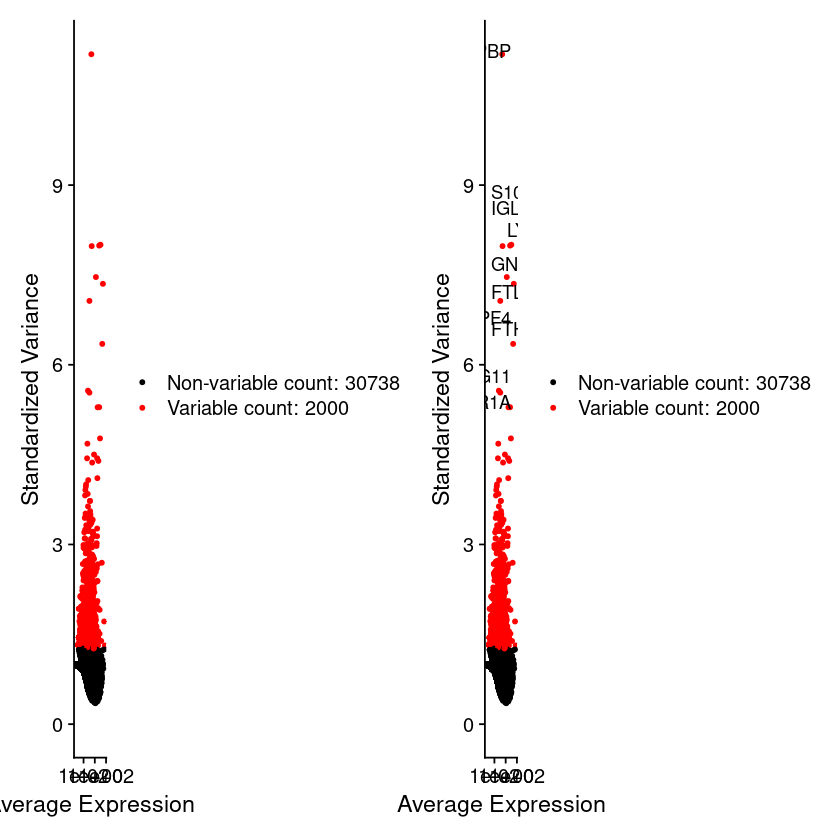

In [6]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [7]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [8]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc), npcs = 500)

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, GIMAP7 
	   BEX2, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, NKG7, KLRG1, SAMD3 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
PC_ 3 
Positive:  PPBP, PF4, SDPR, SPARC, GNG11, NRGN, GP

In [10]:
scaled.data <- GetAssayData(pbmc, slot = "scale.data")

We dump `scale.data` to the matrix and compute GADES.

In [10]:
write.csv(scaled.data, file='scaled_matrix.tsv', sep='\t')

Warning message in write.csv(scaled.data, file = "scaled_matrix.tsv", sep = "\t"):
“attempt to set 'sep' ignored”


In [11]:
dist.matrix <- as.matrix(
    read.table('../Hobotnica-GPU/TestPBMC3K_matrix_euclidean.csv', header=T, row.names=1, sep=',')
)

Here we upload distance matrix as the input to `FindNeighbours`

In [12]:
pbmc_distance <- FindNeighbors(dist.matrix, distance.matrix = T, l2.norm = T)
pbmc_distance_clusters <- FindClusters(pbmc_distance$snn, resolution = 1.0)

Building SNN based on a provided distance matrix

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 3643650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0565
Number of communities: 2
Elapsed time: 1 seconds


In [13]:
head(pbmc_distance$snn)

   [[ suppressing 2700 column names ‘AAACATACAACCAC.1’, ‘AAACATTGAGCTAC.1’, ‘AAACATTGATCAGC.1’ ... ]]



6 x 2700 sparse Matrix of class "dgCMatrix"
                                                                            
AAACATACAACCAC.1 1.0000000 0.6666667 0.6666667 0.4285714 0.6000000 0.6666667
AAACATTGAGCTAC.1 0.6666667 1.0000000 0.6666667 0.5384615 0.6666667 0.7391304
AAACATTGATCAGC.1 0.6666667 0.6666667 1.0000000 0.4814815 0.6000000 0.6000000
AAACCGTGCTTCCG.1 0.4285714 0.5384615 0.4814815 1.0000000 0.6000000 0.6000000
AAACCGTGTATGCG.1 0.6000000 0.6666667 0.6000000 0.6000000 1.0000000 0.8181818
AAACGCACTGGTAC.1 0.6666667 0.7391304 0.6000000 0.6000000 0.8181818 1.0000000
                                                                            
AAACATACAACCAC.1 0.5384615 0.6666667 0.6000000 0.4285714 0.6666667 0.7391304
AAACATTGAGCTAC.1 0.6000000 0.7391304 0.6666667 0.5384615 0.8181818 0.7391304
AAACATTGATCAGC.1 0.4814815 0.6666667 0.6666667 0.5384615 0.6666667 0.6666667
AAACCGTGCTTCCG.1 0.4285714 0.4814815 0.5384615 0.6666667 0.6000000 0.4814815
AAACCGTGTATGCG.1 0.6000000 0.666

## Extra stuff to load Hobotnica Experiments

In [3]:
py_module_available(module = 'umap')

[1] TRUE

In [7]:
umap_import <- import(module = "umap", delay_load = T)

In [9]:
umap_import$pkg_resources

Module(pkg_resources)

In [18]:
umap_import$pkg_resources$get_distribution("umap-learn")

umap-learn 0.5.4 (/2tbsata/home/akhtyamovpavel/PythonEnvironments/ResearchEnv/lib/python3.8/site-packages)

In [19]:
numeric_version(x = umap_import$pkg_resources$get_distribution("umap-learn")$version)

[1] ‘0.5.4’

Here code Hangs for SNN without setting `min.dist`

In [14]:
pbmc_distance <- RunUMAP(pbmc_distance$snn, min.dist = 0.7)

Warning message:
“No assay specified, setting assay as RNA by default.”
